Shapiro-Wilk Test Results for Left/Right DataFrame:
English: W-statistic=0.7406, p-value=0.0001
German: W-statistic=0.9441, p-value=0.2865
French: W-statistic=0.9305, p-value=0.1576
Turkish: W-statistic=0.9687, p-value=0.7275

Shapiro-Wilk Test Results for Aut/Lib DataFrame:
English: W-statistic=0.6150, p-value=0.0000
German: W-statistic=0.8471, p-value=0.0048
French: W-statistic=0.7158, p-value=0.0001
Turkish: W-statistic=0.9131, p-value=0.0732


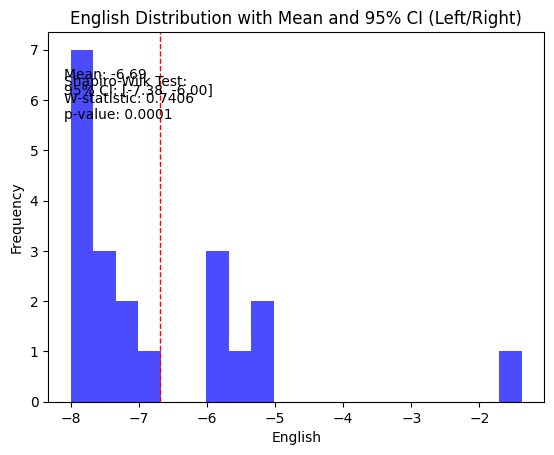

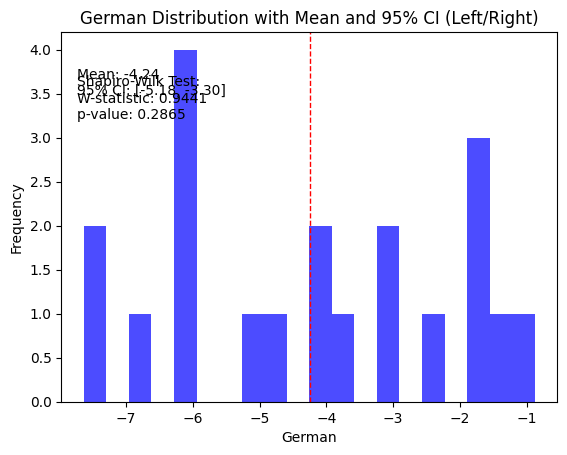

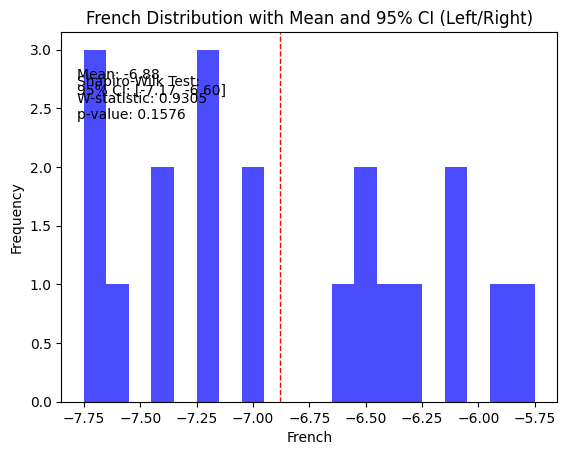

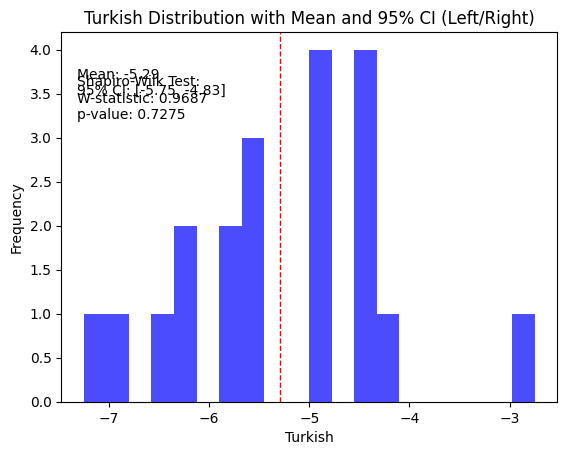

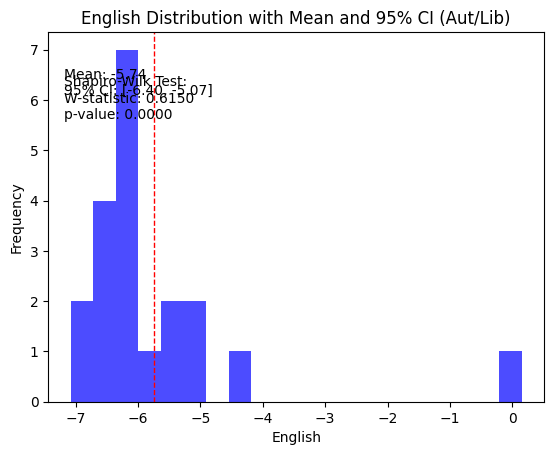

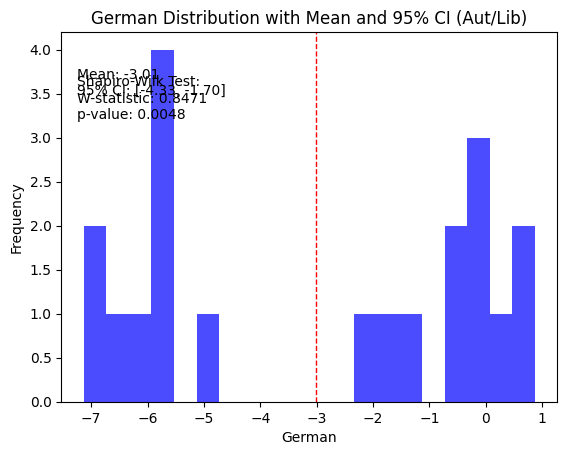

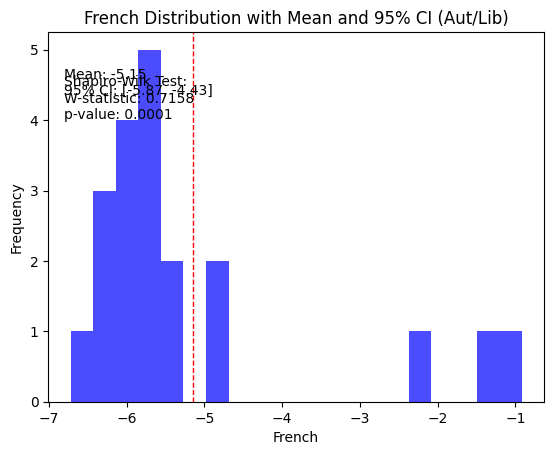

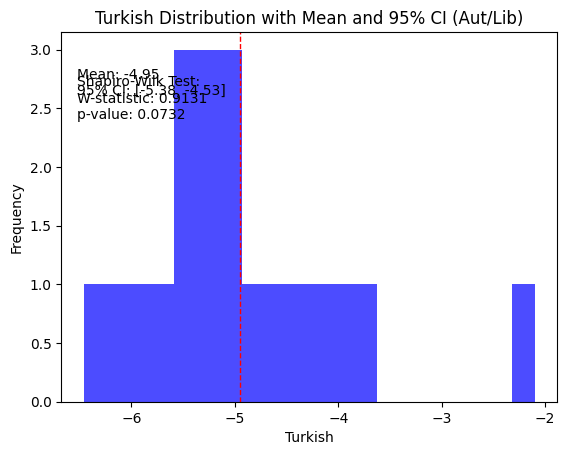

Left/Right DataFrame Statistics:
Means:
 English   -6.6895
German    -4.2405
French    -6.8815
Turkish   -5.2895
dtype: float64
Standard Deviations:
 English    1.572536
German     2.150808
French     0.651616
Turkish    1.041797
dtype: float64
95% Confidence Intervals:
 {'English': (-7.378681441913462, -6.000318558086538), 'German': (-5.1831156799724685, -3.29788432002753), 'French': (-7.1670778821336745, -6.595922117866325), 'Turkish': (-5.74607945599992, -4.832920544000078)}

Aut/Lib DataFrame Statistics:
Means:
 English   -5.7365
German    -3.0140
French    -5.1485
Turkish   -4.9530
dtype: float64
Standard Deviations:
 English    1.523218
German     3.008595
French     1.643197
Turkish    0.975268
dtype: float64
95% Confidence Intervals:
 {'English': (-6.404067353881923, -5.0689326461180775), 'German': (-4.332550844328594, -1.6954491556714064), 'French': (-5.8686497713519135, -4.428350228648087), 'Turkish': (-5.380422360893877, -4.525577639106122)}


In [4]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Data for left/right
left_right_data = {
    'English': [-7.13, -7.63, -7.25, -7.75, -8.00, -5.63, -6.00, -5.13, -7.50, -7.75, -5.13, -7.75, -7.75, -6.00, -6.00, -1.38, -7.75, -7.38, -7.88, -7.00],
    'German': [-3.00, -2.50, -7.63, -4.75, -6.88, -5.13, -4.25, -4.13, -7.50, -6.00, -1.38, -6.25, -1.88, -1.88, -6.13, -3.13, -3.75, -6.13, -1.63, -0.88],
    'French': [-7.63, -7.25, -6.13, -7.00, -6.34, -7.75, -5.88, -7.38, -7.75, -6.13, -7.00, -6.63, -7.75, -6.50, -7.38, -6.50, -7.25, -6.38, -7.25, -5.75],
    'Turkish': [-2.75, -5.00, -5.63, -6.25, -4.88, -5.75, -6.38, -4.50, -4.38, -5.50, -5.63, -5.00, -4.50, -4.88, -7.25, -6.88, -6.13, -4.50, -5.75, -4.25]
}

# Data for aut/lib
aut_lib_data = {
    'English': [-6.10, -6.62, -6.26, -6.26, -7.08, -5.59, -5.13, -6.46, -6.51, -5.85, -5.23, -6.31, -6.72, -5.38, -6.05, 0.15, -4.41, -6.31, -6.56, -6.05],
    'German': [-6.15, -5.69, -4.87, -0.31, -7.03, -5.90, -1.28, -1.69, -7.13, -5.90, 0.87, -5.85, 0.77, -2.05, -6.67, -0.62, 0.31, -0.21, -0.21, -0.67],
    'French': [-5.90, -6.00, -4.72, -6.05, -1.38, -6.72, -5.28, -6.31, -6.15, -5.69, -6.36, -5.38, -2.31, -5.64, -0.92, -5.85, -5.59, -4.87, -5.85, -6.00],
    'Turkish': [-2.10, -5.38, -6.46, -4.97, -5.08, -5.33, -4.92, -5.23, -5.38, -5.49, -5.18, -6.00, -4.36, -4.15, -4.62, -6.05, -5.03, -3.85, -5.74, -3.74]
}

# Creating DataFrames
df_left_right = pd.DataFrame(left_right_data)
df_aut_lib = pd.DataFrame(aut_lib_data)

shapiro_results_left_right = {column: stats.shapiro(df_left_right[column]) for column in df_left_right.columns}
shapiro_results_aut_lib = {column: stats.shapiro(df_aut_lib[column]) for column in df_aut_lib.columns}

# Displaying Shapiro-Wilk test results
print("Shapiro-Wilk Test Results for Left/Right DataFrame:")
for column, result in shapiro_results_left_right.items():
    print(f"{column}: W-statistic={result[0]:.4f}, p-value={result[1]:.4f}")

print("\nShapiro-Wilk Test Results for Aut/Lib DataFrame:")
for column, result in shapiro_results_aut_lib.items():
    print(f"{column}: W-statistic={result[0]:.4f}, p-value={result[1]:.4f}")

# Calculating means and standard deviations
means_left_right = df_left_right.mean()
std_devs_left_right = df_left_right.std()

means_aut_lib = df_aut_lib.mean()
std_devs_aut_lib = df_aut_lib.std()

# Calculating confidence intervals
conf_intervals_left_right = {}
conf_intervals_aut_lib = {}

for column in df_left_right.columns:
    n = df_left_right[column].dropna().count()
    mean = means_left_right[column]
    std = std_devs_left_right[column]
    conf_int = stats.norm.interval(0.95, loc=mean, scale=std/np.sqrt(n))
    conf_intervals_left_right[column] = conf_int

for column in df_aut_lib.columns:
    n = df_aut_lib[column].dropna().count()
    mean = means_aut_lib[column]
    std = std_devs_aut_lib[column]
    conf_int = stats.norm.interval(0.95, loc=mean, scale=std/np.sqrt(n))
    conf_intervals_aut_lib[column] = conf_int

# Plotting each column for left/right
for column in df_left_right.columns:
    plt.figure()
    plt.hist(df_left_right[column].dropna(), bins=20, alpha=0.7, color='blue')
    plt.axvline(means_left_right[column], color='red', linestyle='dashed', linewidth=1)
    plt.title(f'{column} Distribution with Mean and 95% CI (Left/Right)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.figtext(0.15, 0.8, f'Mean: {means_left_right[column]:.2f}\n95% CI: [{conf_intervals_left_right[column][0]:.2f}, {conf_intervals_left_right[column][1]:.2f}]', fontsize=10)
    plt.show()

# Plotting each column for aut/lib
for column in df_aut_lib.columns:
    plt.figure()
    plt.hist(df_aut_lib[column].dropna(), bins=20, alpha=0.7, color='blue')
    plt.axvline(means_aut_lib[column], color='red', linestyle='dashed', linewidth=1)
    plt.title(f'{column} Distribution with Mean and 95% CI (Aut/Lib)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.figtext(0.15, 0.8, f'Mean: {means_aut_lib[column]:.2f}\n95% CI: [{conf_intervals_aut_lib[column][0]:.2f}, {conf_intervals_aut_lib[column][1]:.2f}]', fontsize=10)
    plt.show()

# Displaying means, standard deviations, and confidence intervals
print("Left/Right DataFrame Statistics:")
print("Means:\n", means_left_right)
print("Standard Deviations:\n", std_devs_left_right)
print("95% Confidence Intervals:\n", conf_intervals_left_right)

print("\nAut/Lib DataFrame Statistics:")
print("Means:\n", means_aut_lib)
print("Standard Deviations:\n", std_devs_aut_lib)
print("95% Confidence Intervals:\n", conf_intervals_aut_lib)


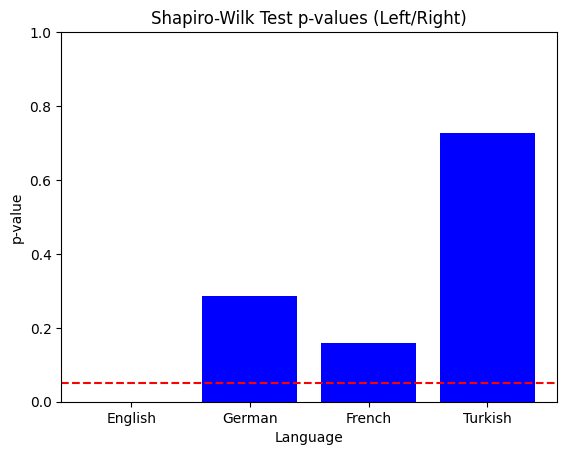

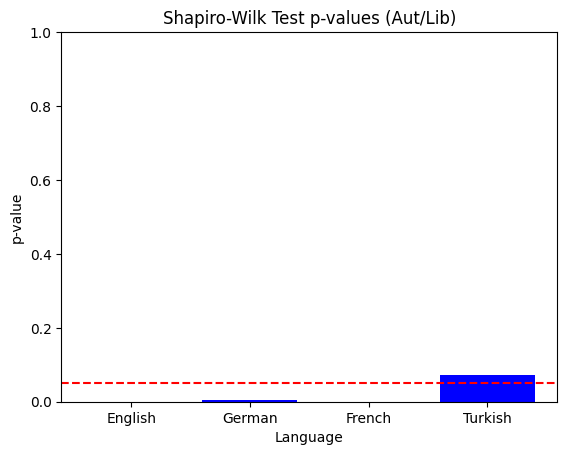

In [5]:
# Plotting Shapiro-Wilk test results for left/right
plt.figure()
plt.bar(shapiro_results_left_right.keys(), [result[1] for result in shapiro_results_left_right.values()], color='blue')
plt.axhline(y=0.05, color='r', linestyle='--')
plt.title('Shapiro-Wilk Test p-values (Left/Right)')
plt.xlabel('Language')
plt.ylabel('p-value')
plt.ylim(0, 1)
plt.show()

# Plotting Shapiro-Wilk test results for aut/lib
plt.figure()
plt.bar(shapiro_results_aut_lib.keys(), [result[1] for result in shapiro_results_aut_lib.values()], color='blue')
plt.axhline(y=0.05, color='r', linestyle='--')
plt.title('Shapiro-Wilk Test p-values (Aut/Lib)')
plt.xlabel('Language')
plt.ylabel('p-value')
plt.ylim(0, 1)
plt.show()


In [12]:
import scipy.stats as stats

# Perform Mann-Whitney U test within each dataframe
mannwhitney_results_left_right = {}
mannwhitney_results_aut_lib = {}

# Compare each pair of columns within left/right dataframe
columns = df_left_right.columns
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        stat, p_value = stats.mannwhitneyu(df_left_right[columns[i]], df_left_right[columns[j]], alternative='two-sided')
        mannwhitney_results_left_right[f"{columns[i]} vs {columns[j]}"] = {'statistic': stat, 'p_value': p_value}

# Compare each pair of columns within aut/lib dataframe
columns = df_aut_lib.columns
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        stat, p_value = stats.mannwhitneyu(df_aut_lib[columns[i]], df_aut_lib[columns[j]], alternative='two-sided')
        mannwhitney_results_aut_lib[f"{columns[i]} vs {columns[j]}"] = {'statistic': stat, 'p_value': p_value}

# Apply Bonferroni correction
num_tests_left_right = len(mannwhitney_results_left_right)
bonferroni_alpha_left_right = 0.05 / num_tests_left_right

num_tests_aut_lib = len(mannwhitney_results_aut_lib)
bonferroni_alpha_aut_lib = 0.05 / num_tests_aut_lib

# Displaying the Mann-Whitney U test results with Bonferroni correction
print("Mann-Whitney U Test Results with Bonferroni Correction (Left/Right):")
for comparison, result in mannwhitney_results_left_right.items():
    significant = "Significant" if result['p_value'] < bonferroni_alpha_left_right else "Not Significant"
    print(f"{comparison}: Statistic = {result['statistic']:.2f}, p-value = {result['p_value']:.4f} ({significant})")

print("\nMann-Whitney U Test Results with Bonferroni Correction (Aut/Lib):")
for comparison, result in mannwhitney_results_aut_lib.items():
    significant = "Significant" if result['p_value'] < bonferroni_alpha_aut_lib else "Not Significant"
    print(f"{comparison}: Statistic = {result['statistic']:.2f}, p-value = {result['p_value']:.4f} ({significant})")


bonferroni_alpha_aut_lib

Mann-Whitney U Test Results with Bonferroni Correction (Left/Right):
Engelsk vs Tysk: Statistic = 70.00, p-value = 0.0004 (Significant)
Engelsk vs Fransk: Statistic = 180.50, p-value = 0.6054 (Not Significant)
Engelsk vs Tyrkiet: Statistic = 65.50, p-value = 0.0003 (Significant)
Tysk vs Fransk: Statistic = 346.50, p-value = 0.0001 (Significant)
Tysk vs Tyrkiet: Statistic = 257.50, p-value = 0.1228 (Not Significant)
Fransk vs Tyrkiet: Statistic = 35.00, p-value = 0.0000 (Significant)

Mann-Whitney U Test Results with Bonferroni Correction (Aut/Lib):
Engelsk vs Tysk: Statistic = 103.50, p-value = 0.0094 (Not Significant)
Engelsk vs Fransk: Statistic = 130.50, p-value = 0.0618 (Not Significant)
Engelsk vs Tyrkiet: Statistic = 75.00, p-value = 0.0008 (Significant)
Tysk vs Fransk: Statistic = 269.50, p-value = 0.0618 (Not Significant)
Tysk vs Tyrkiet: Statistic = 248.00, p-value = 0.1988 (Not Significant)
Fransk vs Tyrkiet: Statistic = 131.50, p-value = 0.0657 (Not Significant)


(0.008333333333333333, 6)

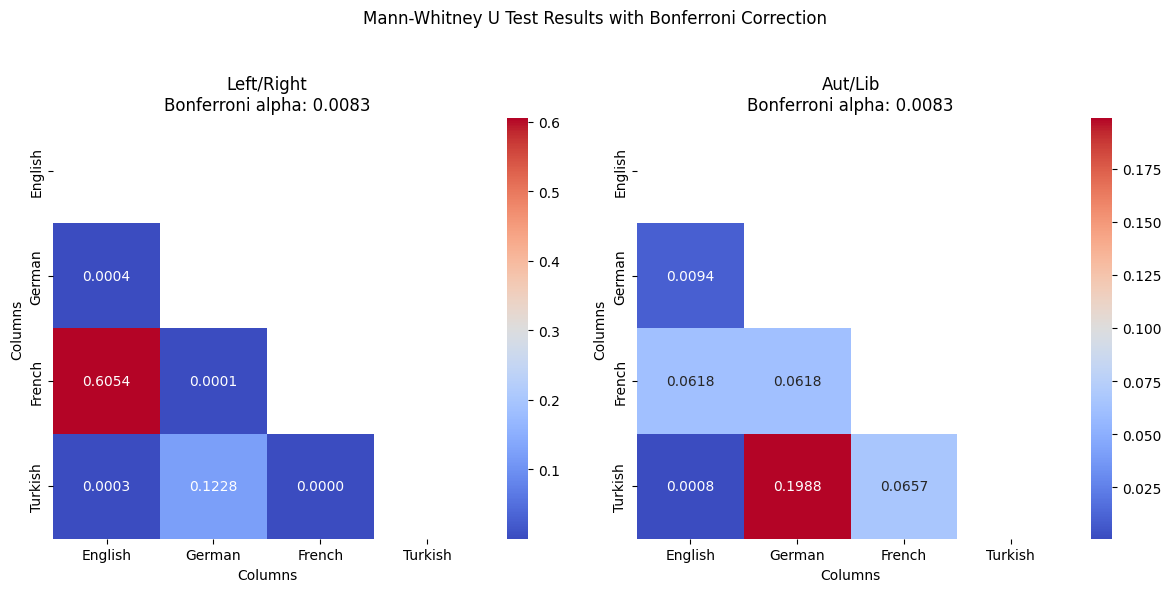

In [6]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_left_right and df_aut_lib are already defined

# Perform Mann-Whitney U test within each dataframe
mannwhitney_results_left_right = pd.DataFrame(index=df_left_right.columns, columns=df_left_right.columns)
mannwhitney_results_aut_lib = pd.DataFrame(index=df_aut_lib.columns, columns=df_aut_lib.columns)

# Compare each pair of columns within left/right dataframe
columns = df_left_right.columns
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        stat, p_value = stats.mannwhitneyu(df_left_right[columns[i]], df_left_right[columns[j]], alternative='two-sided')
        mannwhitney_results_left_right.loc[columns[i], columns[j]] = p_value
        mannwhitney_results_left_right.loc[columns[j], columns[i]] = p_value

# Compare each pair of columns within aut/lib dataframe
columns = df_aut_lib.columns
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        stat, p_value = stats.mannwhitneyu(df_aut_lib[columns[i]], df_aut_lib[columns[j]], alternative='two-sided')
        mannwhitney_results_aut_lib.loc[columns[i], columns[j]] = p_value
        mannwhitney_results_aut_lib.loc[columns[j], columns[i]] = p_value

# Apply Bonferroni correction
num_tests_left_right = len(columns) * (len(columns) - 1) / 2
bonferroni_alpha_left_right = 0.05 / num_tests_left_right

num_tests_aut_lib = len(columns) * (len(columns) - 1) / 2
bonferroni_alpha_aut_lib = 0.05 / num_tests_aut_lib

# Mask for the upper triangle
mask_left_right = np.triu(np.ones_like(mannwhitney_results_left_right, dtype=bool))
mask_aut_lib = np.triu(np.ones_like(mannwhitney_results_aut_lib, dtype=bool))

# Create heatmaps for p-values
plt.figure(figsize=(12, 6))
plt.suptitle('Mann-Whitney U Test Results with Bonferroni Correction')

plt.subplot(1, 2, 1)
sns.heatmap(mannwhitney_results_left_right.astype(float), annot=True, cmap='coolwarm', cbar=True, mask=mask_left_right, fmt='.4f')
plt.title(f'Left/Right\nBonferroni alpha: {bonferroni_alpha_left_right:.4f}')
plt.xlabel('Columns')
plt.ylabel('Columns')

plt.subplot(1, 2, 2)
sns.heatmap(mannwhitney_results_aut_lib.astype(float), annot=True, cmap='coolwarm', cbar=True, mask=mask_aut_lib, fmt='.4f')
plt.title(f'Aut/Lib\nBonferroni alpha: {bonferroni_alpha_aut_lib:.4f}')
plt.xlabel('Columns')
plt.ylabel('Columns')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
